# Identify Manhattan based on a dataset

**Note: ** The original notebook template is:[https://github.com/kazunori279/TensorFlow-for-absolute-beginners/blob/master/2.%20Classify%20Manhattan%20with%20TensorFlow.ipynb](https://github.com/kazunori279/TensorFlow-for-absolute-beginners/blob/master/2.%20Classify%20Manhattan%20with%20TensorFlow.ipynb)

Instead of using the template itself, this will work as a scratch notebook with a locally downloaded dataset.

In [1]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
columns = ['LONGITUDE', 'LATITUDE', 'BOROUGH']
data = pd.read_csv('../data/NYPD_Motor_Vehicle_Collisions.zip', compression='zip', usecols=columns)

In [5]:
data

,BOROUGH,LATITUDE,LONGITUDE
0,BROOKLYN,40.693490,-73.979170
1,MANHATTAN,40.752117,-73.977684
2,QUEENS,40.703700,-73.903240
3,NaN,40.513985,-74.235500
4,NaN,40.717236,-73.960530
5,NaN,40.528133,-74.216606
6,NaN,40.671925,-73.881190
7,NaN,40.604313,-74.052080
8,BROOKLYN,40.659275,-73.889000
9,QUEENS,40.728344,-73.735466


In [6]:
print("There is a total of {} entries".format(len(data)))

There is a total of 1129984 entries


The data is incomplete in some cases.

In [7]:
len(data[data['LONGITUDE'] == 0.0])

72

In [8]:
data.drop(data[data['LONGITUDE'] == 0.0].index, inplace=True)
data.drop(data[data['LATITUDE'] == 0.0].index, inplace=True)
data.drop(data[data['BOROUGH'] == 'BRONX'].index, inplace=True)
len(data)

1021737

In [9]:
data['is_manhattan'] = data['BOROUGH'] == 'MANHATTAN'
data.drop('BOROUGH', axis=1, inplace=True)
data.dropna(inplace=True)

In [10]:
data.head()

,LATITUDE,LONGITUDE,is_manhattan
0,40.693490,-73.979170,False
1,40.752117,-73.977684,True
2,40.703700,-73.903240,False
3,40.513985,-74.235500,False
4,40.717236,-73.960530,False


In [11]:
from sklearn.utils import shuffle
data = shuffle(data);

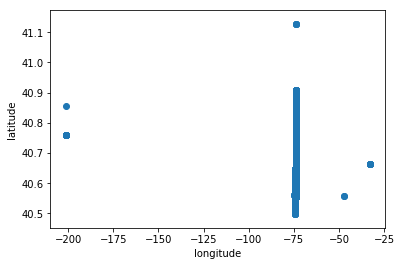

In [12]:
plt.scatter(data['LONGITUDE'], data['LATITUDE']);
plt.xlabel('longitude');
plt.ylabel('latitude');

The scatter plot is clearly distorted due to the range of latitude and longitudes in the dataset. This is probably due to the places where the collisions took place, regardless of them being reported in NYC (or added to this dataset).

If a filter is applied to represent data from only Manhattan, then a familiar shape appears.

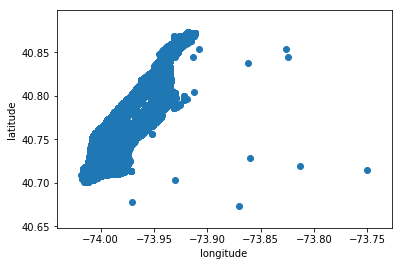

In [13]:
plt.scatter(data.loc[data['is_manhattan'], 'LONGITUDE'], data.loc[data['is_manhattan'], 'LATITUDE']);
plt.xlabel('longitude');
plt.ylabel('latitude');

To further preprocess the data, the outliers will be removed.

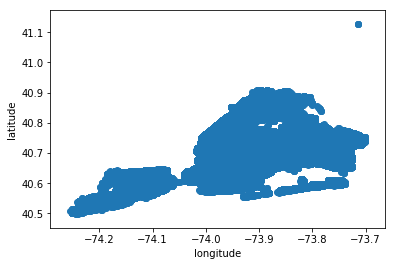

In [14]:
data = data.drop(data[data['LONGITUDE'] < -74.5].index)
data = data.drop(data[data['LONGITUDE'] > -70].index)

plt.scatter(data['LONGITUDE'], data['LATITUDE']);
plt.xlabel('longitude');
plt.ylabel('latitude');

There are still a couple of points that seem to be outside of NYC, but that should be ok (we just wanted to be able to show the data with a recognisable geographical shape).

## Further processing

In [15]:
is_mt = data['is_manhattan']
is_mt= is_mt.astype(np.int32);

latlng = data[['LATITUDE', 'LONGITUDE']].astype(np.float32)

print(len(is_mt), len(latlng))

816514 816514


Normalization.

In [16]:
from sklearn.preprocessing import StandardScaler
latlng_std = StandardScaler().fit_transform(latlng)

In [17]:
print("mean: {}".format(latlng_std.mean()))
print("standard deviation: {}".format(latlng_std.std()))

assert np.isclose(1, latlng_std.std())
assert np.isclose(0, latlng_std.mean())

mean: 4.636067401002749e-14
standard deviation: 1.0000000000000002


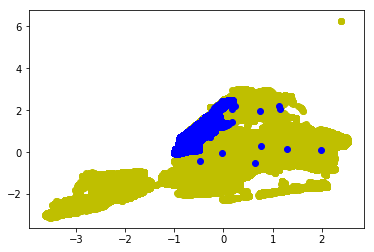

In [18]:
lat = latlng_std[:,0]
lng = latlng_std[:,1]
plt.scatter(lng[is_mt == 0], lat[is_mt == 0], c='y') # plot points outside Manhattan in yellow
plt.scatter(lng[is_mt == 1], lat[is_mt == 1], c='b') # plot points in Manhattan in blue
plt.show();

Using just 10K of data, will work on a 80-20 split.

In [19]:
# 8,000 pairs for training
latlng_train = latlng_std[0:8000]
is_mt_train = is_mt[0:8000]

# 2,000 pairs for test
latlng_test = latlng_std[8000:10000]
is_mt_test = is_mt[8000:10000]

print("Split finished.")

Split finished.


## Training

We are going to train a simple DNN classifier.

In [20]:
tf.logging.set_verbosity(tf.logging.ERROR) # supress warning messages

# define two feature columns consisting of real values
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=2)]

# create a neural network
dnnc = tf.contrib.learn.DNNClassifier(
  feature_columns=feature_columns,
  hidden_units=[],
  n_classes=2)

dnnc

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x136a43160>, 'hidden_units': [], 'feature_columns': (_RealValuedColumn(column_name='', dimension=2, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x12fcc18c8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

A single step of training.

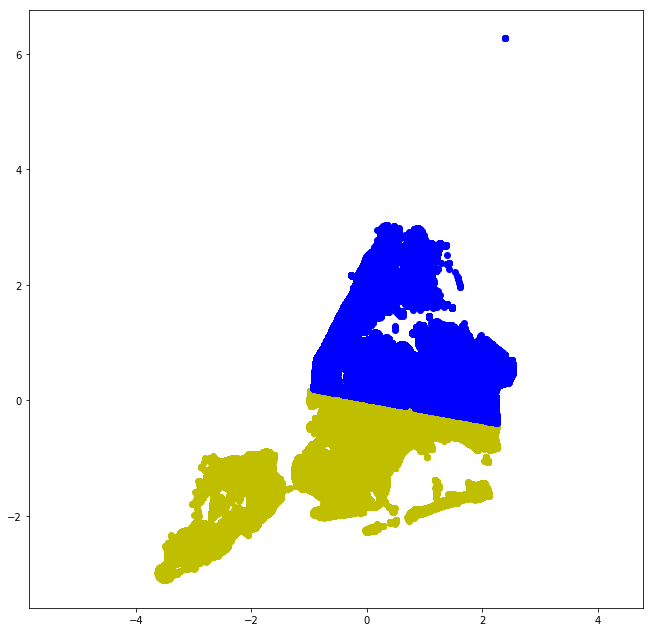

Accuracy: 67.30%


In [21]:
# plot a predicted map of Manhattan
def plot_predicted_map():
    is_mt_pred = dnnc.predict(latlng_std, as_iterable=False) # an array of prediction results
    plt.figure(figsize=(11,11))
    plt.scatter(lng[is_mt_pred == 0], lat[is_mt_pred == 0], c='y')
    plt.scatter(lng[is_mt_pred == 1], lat[is_mt_pred == 1], c='b')
    plt.axes().set_aspect('equal', 'datalim')
    plt.show();

# print the accuracy of the neural network
def print_accuracy():
    accuracy = dnnc.evaluate(x=latlng_test, y=is_mt_test)["accuracy"]
    print('Accuracy: {:.2%}'.format(accuracy))
  
# train the model for just 1 step and print the accuracy
dnnc.fit(x=latlng_train, y=is_mt_train, steps=1)
plot_predicted_map()
print_accuracy()

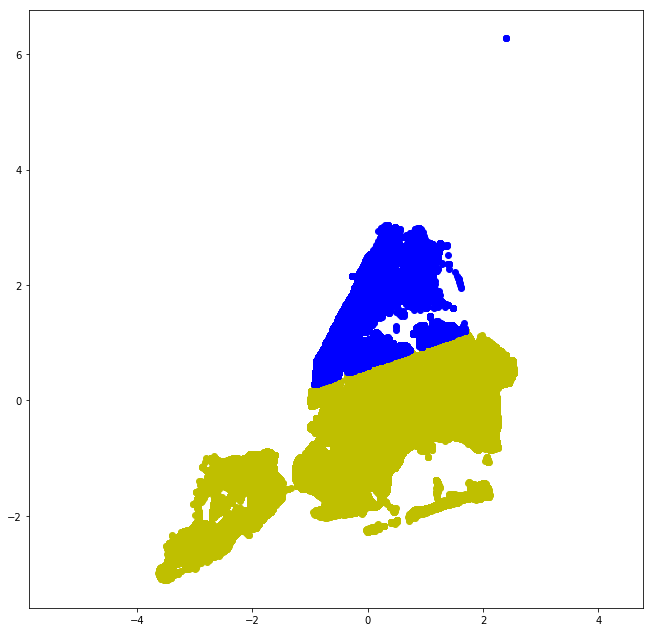

Steps: 100
Accuracy: 86.25%


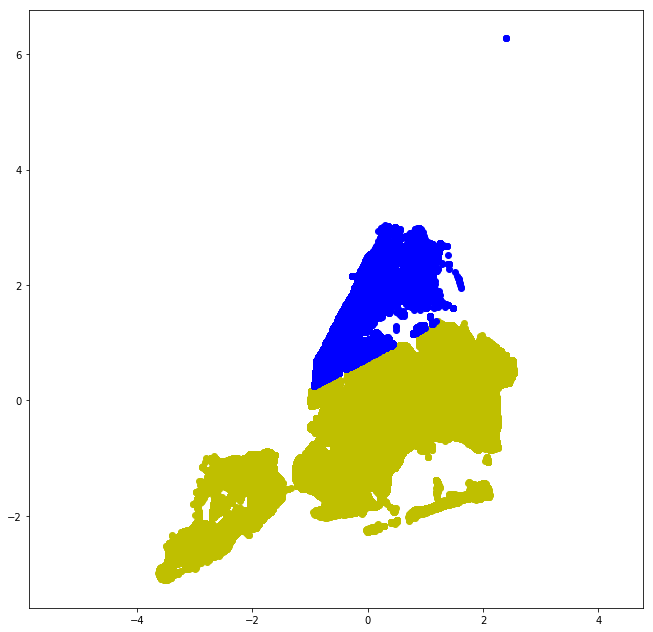

Steps: 200
Accuracy: 89.05%


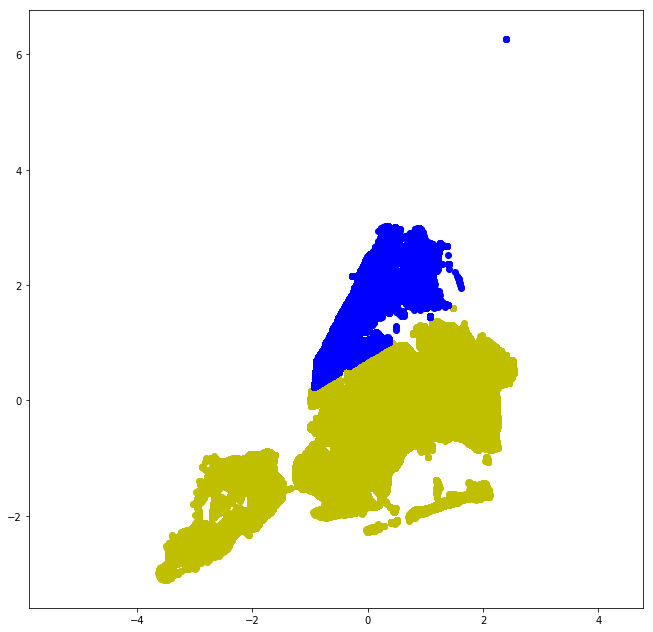

Steps: 300
Accuracy: 89.60%


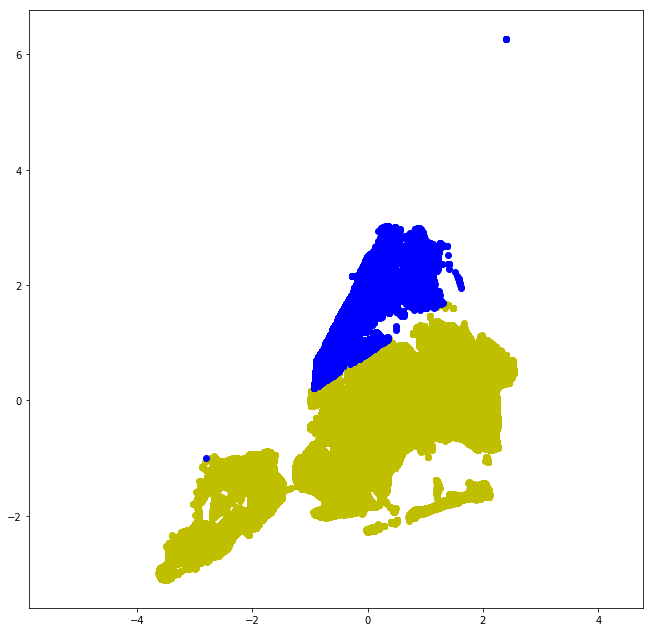

Steps: 400
Accuracy: 90.25%


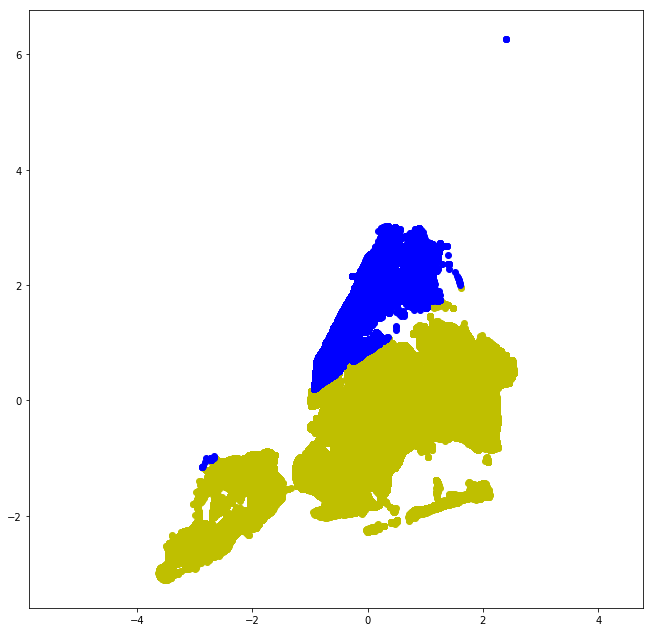

Steps: 500
Accuracy: 90.55%

Training Finished.


In [22]:
steps = 100
for i in range (1, 6):
    dnnc.fit(x=latlng_train, y=is_mt_train, steps=steps)
    plot_predicted_map()
    print('Steps: ' + str(i * steps))
    print_accuracy()
  
print('\nTraining Finished.')

Further runs, or an increase in the number of steps doesn't help much. This is due to the DNN note being deep at all and acting as a linear classifier. The network can only separate Manhattan from the rest via a straight line, but the boroughs don't have that kind of shape.

We can increase the number of layers to include support for non-linearities.

In [23]:
dnnc = tf.contrib.learn.DNNClassifier(
  feature_columns=feature_columns,
  hidden_units=[20, 20, 20, 20],
  n_classes=2)
dnnc

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1447402e8>, 'hidden_units': [20, 20, 20, 20], 'feature_columns': (_RealValuedColumn(column_name='', dimension=2, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x12fcc18c8>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

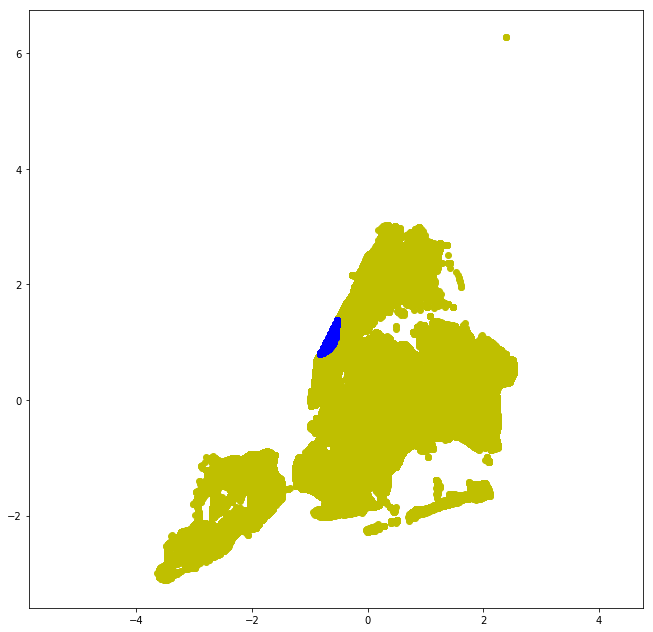

Steps: 30
Accuracy: 77.10%


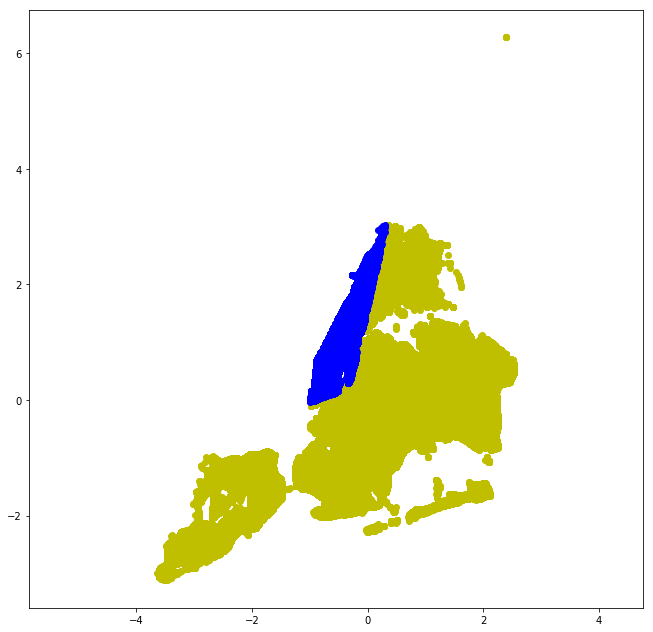

Steps: 60
Accuracy: 96.65%


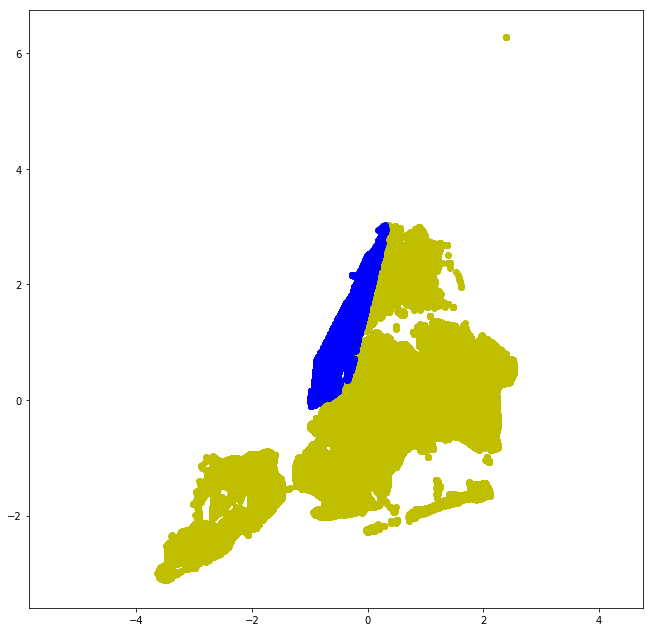

Steps: 90
Accuracy: 96.75%


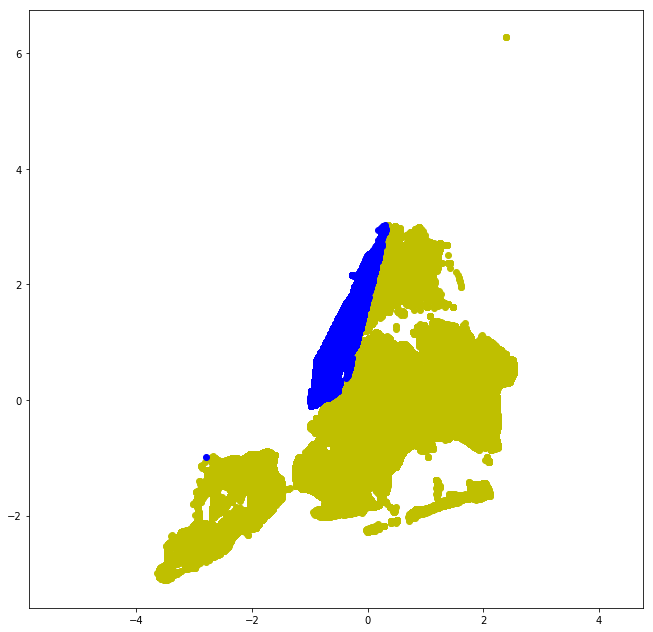

Steps: 120
Accuracy: 96.80%


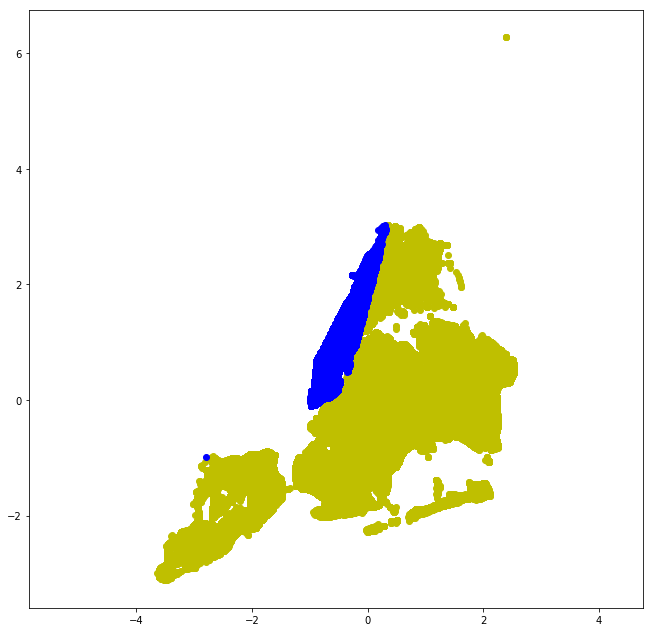

Steps: 150
Accuracy: 96.80%

Training Finished.


In [24]:
steps = 30
for i in range (1, 6):
    dnnc.fit(x=latlng_train, y=is_mt_train, steps=steps)
    plot_predicted_map()
    print('Steps: {}'.format(i * steps))
    print_accuracy()
  
print('\nTraining Finished.')

It is quite possible that using 4 hidden layers is an overkill...

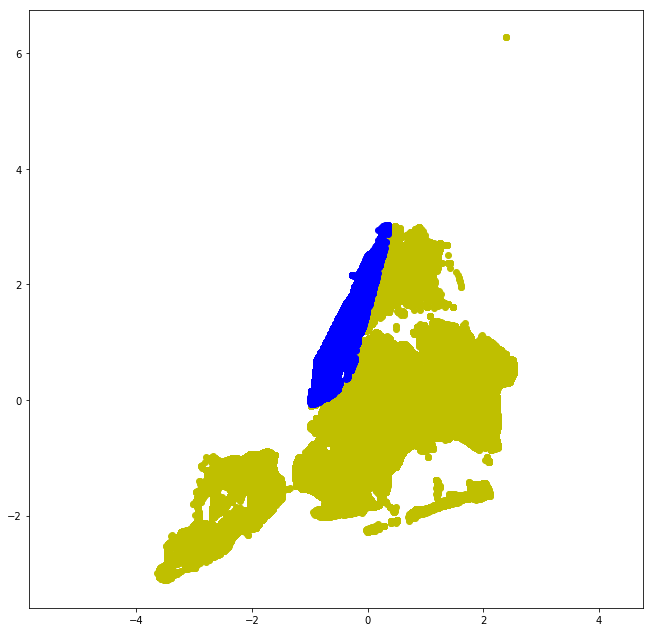

Accuracy: 96.65%

Training Finished.


In [25]:
dnnc = tf.contrib.learn.DNNClassifier(
  feature_columns=feature_columns,
  hidden_units=[20, 20],
  n_classes=2)

steps = 150
dnnc.fit(x=latlng_train, y=is_mt_train, steps=steps)
plot_predicted_map()
print_accuracy()
  
print('\nTraining Finished.')